# Clasificador Naive-Bayes - caso Adela

### Preprocesamiento

In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import StemmerTokenizer, make_BoW_preprocess


tokenizador = StemmerTokenizer(stem=False)
preprocessing = make_BoW_preprocess(tokenizador,'comment',max_ngram=1,min_ngram=1,mindf=10)

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

bog_pipeline = Pipeline(
    [("Preprocessing", preprocessing),
    # ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

### Cargar datos

In [3]:
from utils.cargar import df_caso
from utils.preprocesamiento import process_df, procesar_adela

caso = 'adela'
df = df_caso(caso)

df = procesar_adela(df)
df = df[df['opt_left'] == 'Producir el alimento contra déficit vitamínico']

df = process_df(df,'comment','sel',verbose=True)

df = df.drop(columns=['user_id','team_id','gender','df','title','opt_left','opt_right','max_num','phase','time','curso'])

df.head()

26 rows found with non string elements for column comment (0.40%)
Deleting 685 columns for which max target value is over 7 (10.58%)
5761 available rows after processing


,sel,comment
id,,
26276,2,Adela debería priorizar la salud de las person...
26277,5,Resguardar la identidad del pueblo originario ...
26279,1,creo que las creencias religiosas o tradicione...
26280,3,El objetivo del proyecto no es mutuamente excl...
26281,5,Se deben preservar las tradiciones de los pueb...


In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'], random_state=0)

In [5]:
bog_pipeline.fit(df_train,y_train)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(min_df=10,
                                                                  tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7fd3100b98b0>),
                                                  'comment')])),
                ('Clasificador', MultinomialNB())])

In [6]:
from sklearn.metrics import classification_report

y_pred = bog_pipeline.predict(df_test)

print("Resultados clasificador Naive-Bayes multinomial")
print(classification_report(y_test, y_pred))

Resultados clasificador Naive-Bayes multinomial
              precision    recall  f1-score   support

           1       0.40      0.38      0.39       157
           2       0.47      0.47      0.47       363
           3       0.47      0.54      0.50       434
           4       0.35      0.32      0.33       257
           5       0.41      0.40      0.41       173
           6       0.37      0.19      0.25        57

    accuracy                           0.43      1441
   macro avg       0.41      0.38      0.39      1441
weighted avg       0.43      0.43      0.43      1441



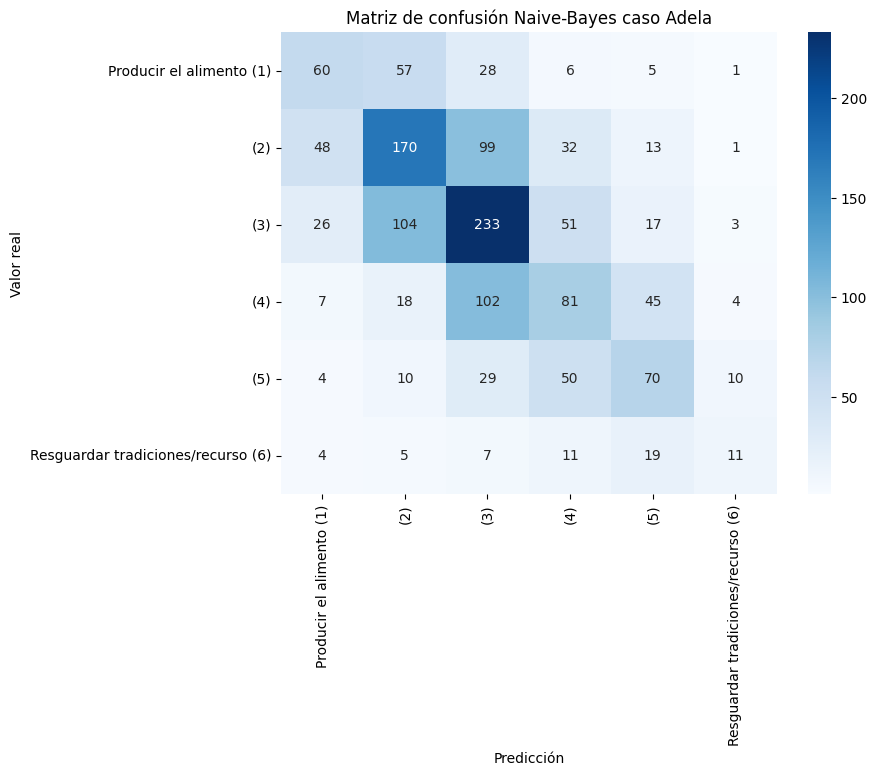

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Example class labels
class_labels = ['Producir el alimento (1)', '(2)', '(3)', '(4)', '(5)', 'Resguardar tradiciones/recurso (6)']

# Convert confusion matrix to NumPy array
cm_array = np.array(cm)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_array, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión Naive-Bayes caso Adela')

# Show the plot
plt.show()

In [8]:
df.loc[(df['sel']==2) | (df['sel']==3),'sel'] = 1
df.loc[(df['sel']==4) | (df['sel']==5),'sel'] = 6

df.head()

,sel,comment
id,,
26276,1,Adela debería priorizar la salud de las person...
26277,6,Resguardar la identidad del pueblo originario ...
26279,1,creo que las creencias religiosas o tradicione...
26280,1,El objetivo del proyecto no es mutuamente excl...
26281,6,Se deben preservar las tradiciones de los pueb...


In [9]:
df['sel'].value_counts()

sel
1    3813
6    1948
Name: count, dtype: int64

In [10]:
df_train_binary, df_test_binary, y_train_binary, y_test_binary = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'], random_state=0)

preprocessing = make_BoW_preprocess(tokenizador,'comment',max_ngram=2,min_ngram=1,mindf=10)

bog_pipeline_binary = Pipeline(
    [("Preprocessing", preprocessing),
    # ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

bog_pipeline_binary.fit(df_train_binary,y_train_binary)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(min_df=10,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7fd3100b98b0>),
                                                  'comment')])),
                ('Clasificador', MultinomialNB())])

In [11]:
y_pred_binary = bog_pipeline_binary.predict(df_test_binary)

print("Resultados clasificador Naive-Bayes multinomial (binario)")
print(classification_report(y_test_binary, y_pred_binary))

Resultados clasificador Naive-Bayes multinomial (binario)
              precision    recall  f1-score   support

           1       0.85      0.83      0.84       954
           6       0.69      0.71      0.70       487

    accuracy                           0.79      1441
   macro avg       0.77      0.77      0.77      1441
weighted avg       0.79      0.79      0.79      1441



### Probabilidad por palabra/n_grama en Naive-Bayes

Comenzamos por extraer el vectorizador

In [12]:
vectorizer = bog_pipeline.named_steps['Preprocessing'].transformers_[0][1]
vectorizer

CountVectorizer(min_df=10,
                tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7fd2ce57a2b0>)

In [13]:
from NB_utils import get_probs, get_top_k_ngrams

prob_1, prob_6 = [], []

for ngram in vectorizer.get_feature_names_out():
    probs = get_probs(ngram,bog_pipeline_binary,df_test_binary,'comment')
    prob_1.append(probs[0])
    prob_6.append(probs[1])


op_left, op_right = 'Producir el alimento', 'Resguardar tradiciones/recurso'

get_top_k_ngrams(10,vectorizer,prob_1,prob_6,op_left,op_right);

Top features 'Producir el alimento':
salvar 0.9850757167193909
juego 0.9589416426994265
vidas 0.9525060938146097
tribu 0.9507237155401059
religiosas 0.9481281470801085
poniendo 0.9420201060316521
riesgo 0.9383929112652638
tiempos 0.9342815991664724
cambian 0.9342815991664724
ayudaria 0.9342815991664724

Top features 'Resguardar tradiciones/recurso':
siglos 0.8807510221140485
suplementos 0.8630617786067957
sol 0.8253861418636597
existen 0.8227740010872212
única 0.7700217160507917
usuario 0.761934254557929
consentimiento 0.761934254557929
integridad 0.7303224790335253
sacar 0.7242191780159098
obtener 0.723129422679366
